## Nearest Centroid Classifier (Clasificador Euclideano)

Es un algoritmo de aprendizaje supervisado. Este algoritmo consiste en **"condensar"** la información del conjunto de entrenamiento en **centroides (centros de nubes de puntos)** para hacer predicciones a nuevos patrones, **asignando cada nuevo patron al centroide más cercano**. 

**Un centroide es el centro geométrico de un conjunto de datos, éste algoritmo utiliza la media para calcular el centro geométrico. En múltiples dimensiones, este sería el valor medio a lo largo de cada dimensión, formando un punto de centro de la distribución a través de cada variable.**

El algoritmo asume que los centroides en el espacio de características (atributos) de entrada son diferentes para cada etiqueta de destino, es decir, que **no existen dos o más centroides iguales para una etiqueta**.

**Los centroides "representan" el modelo. Dados nuevos patrones se calcula la distancia entre cada patron y cada centroide y se usa el centroide más cercano para hacer la predicción.**

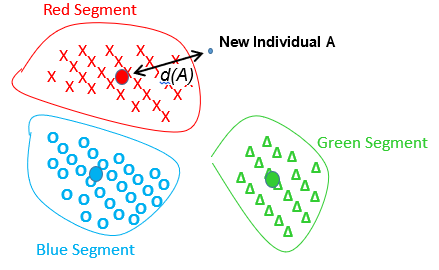

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Procesamiento

In [ ]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

### Train, Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

### Modelo

In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
# NearestCentroid

model = NearestCentroid(metric = "euclidean")

model.fit(X_train, y_train)

### Predicciones

In [ ]:
yhat = model.predict(X_test)

yhat

### Métricas

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

### Confusion Matrix

In [ ]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

### Classification Report

In [ ]:
print(classification_report(y_test, yhat, digits = 3))

### Atributos del Modelo

In [ ]:
# .centroids_ retorna un array con los centroides del modelo, uno por cada clase. 

model.centroids_

In [ ]:
# .classes_ retorna las etiquetas de la variable objetivo

model.classes_

In [ ]:
# .n_features_in_ retorna el número de atributos (columnas) de los centroides

model.n_features_in_

### Centroides y nubes de puntos

In [ ]:
a, b = 0, 1

plt.figure(figsize = (12, 8))

sns.scatterplot(x = X[:, a], y = X[:, b], hue = y, palette = "viridis")

plt.plot(model.centroids_[0][a], model.centroids_[0][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[1][a], model.centroids_[1][b], marker = "*", markersize = 12, color = "red")
plt.plot(model.centroids_[2][a], model.centroids_[2][b], marker = "*", markersize = 12, color = "red")

plt.show()

In [ ]:
for i in range(4):
    for j in range(4):
        if i != j:

            plt.figure(figsize = (8, 5))

            sns.scatterplot(x = X[:, i], y = X[:, j], hue = y, palette = "viridis")

            plt.plot(model.centroids_[0][i], model.centroids_[0][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[1][i], model.centroids_[1][j], marker = "*", markersize = 12, color = "red")
            plt.plot(model.centroids_[2][i], model.centroids_[2][j], marker = "*", markersize = 12, color = "red")

            plt.show()

In [ ]:
################################################################################################################################

### Ejercicio 1: 
- Utiliza el dataset del titanic para practicar **`NearestCentroid`**:

### Ejercicio 2:
- Intenta recrear el algormito de **`NearestCentroid`**:
1. Sea **`x`** un patron de prueba a clasificar.
2. Se calculan los **`n-centroides`** (uno para cada clase).
3. Se calcula la distancia entre los **`n-centroides`** y el patron.
5. Asigna la clase del centroide más cercano al nuevo patron.
6. Repite el algoritmo con otra formula de distancia.